This notebook is used to visualize the processed events.

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
from visual_utils import *

path_raw = './RawData/'
path_cleaned = './CleanedData/'
path_processed = './ProcessedData/'
path_matched = './MatchedEvents/'

In [7]:
crash_type = 'Crash'
# nearcrash_type = 'NearCrash'

data_ego = pd.read_hdf(path_processed + 'HundredCar_'+crash_type+'_Ego.h5', key='data')
data_sur = pd.read_hdf(path_processed + 'HundredCar_'+crash_type+'_Surrounding.h5', key='data')
matched_events = pd.read_hdf(path_matched + 'HundredCar_'+crash_type+'es.h5', key='data')
meta = pd.read_csv(path_cleaned + 'HundredCar_metadata_'+crash_type+'Event.csv').set_index('webfileid')

### Visualize BEV trajectories

In [3]:
i = 0

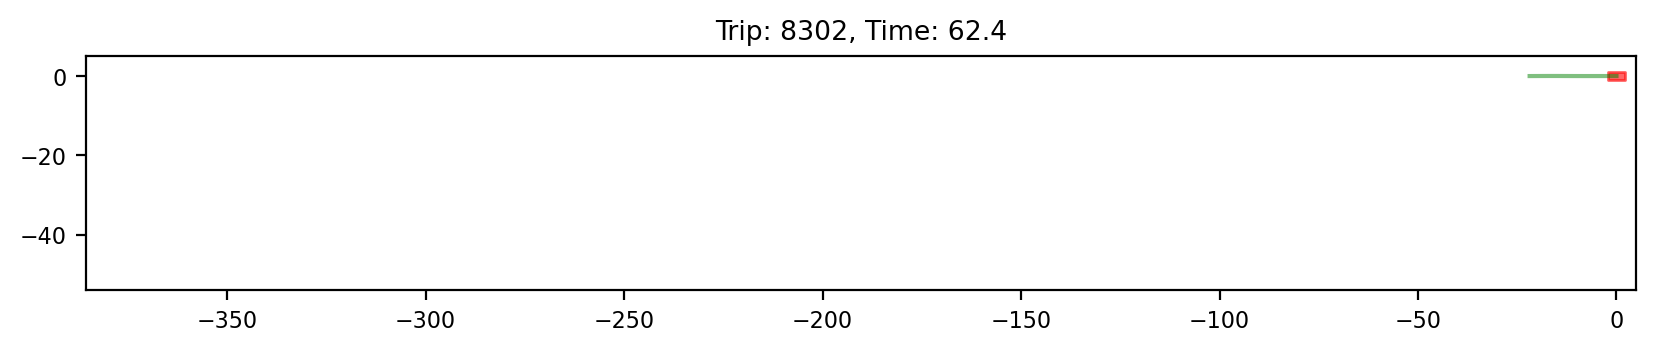

In [4]:
trip_id = data_ego['trip_id'].unique()[i]

df_ego = data_ego[data_ego['trip_id'] == trip_id]
df_sur = data_sur[data_sur['trip_id'] == trip_id]

if len(df_sur)==0:
    print('No surrounding data collected for trip ', trip_id)
else:
    visualize_trip(df_ego, df_sur, trip_id)

i += 1

### Visualize matched events

`_i` : ego/subject vehicle

`_j` : surrounding/target vehicle

In [3]:
i = 0

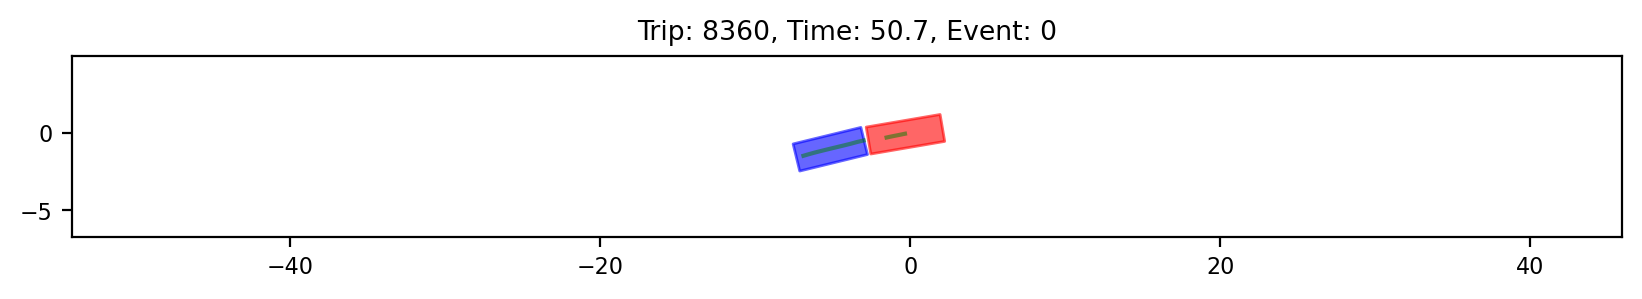

In [4]:
trip_id = matched_events['trip_id'].unique()[i]

events = matched_events[matched_events['trip_id']==trip_id]
visualize_event(events, trip_id)

i += 1

save plots for making .gif

In [9]:
for trip_id in matched_events['trip_id'].unique():
    print(f'saving trip {trip_id} visualizations...')
    save_dir = f'./visual_examples/{trip_id}/'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    events = matched_events[matched_events['trip_id']==trip_id]
    visualize_event(events, trip_id, save=True, save_dir=save_dir)

    clear_output(wait=True)

Saved visualizations for trip 9123
